In [16]:
#!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import sys
import threading
import numpy as np

In [22]:
class Graph:
    def __init__(self,adj={}):
        self.adj = adj
        self.nodes = []
        self.nodes = list(adj)
        for n in self.adj:
            self.nodes += list(self.adj[n])
        self.nodes = list(set(self.nodes))

        for n in self.nodes:
            if n not in self.adj:
                self.adj[n] = {}

In [50]:
nodes = {'s':{'v':1,'w':4},
         'v':{'t':6,'w':2},
         'w':{'t':3},
         't':{}}

In [51]:
g = Graph(nodes)

In [52]:
g.adj

{'s': {'v': 1, 'w': 4}, 'v': {'t': 6, 'w': 2}, 'w': {'t': 3}, 't': {}}

In [67]:
X=[]
A = {}
B = {}

def greedy(g,X,V):
    val = np.inf
    v_star = ''
    w_star = ''
    
    for v in X:
        for w in V:
            if w in g.adj[v]:
                tmp = A[v] + g.adj[v][w]
                if tmp < val:
                    val = tmp
                    v_star = v
                    w_star = w
    return v_star, w_star                    

def dijkstra(g,ith_node):
    V = g.nodes.copy()
    X.append(ith_node)
    V.remove(ith_node)
    
    A[ith_node] = 0
    B[ith_node] = [ith_node]
    
    while V:
        v,w = greedy(g,X,V)
        X.append(w)
        V.remove(w)
        A[w] = A[v] + g.adj[v][w]
        B[w] = B[v] + [w]
    return A, B    
        
    

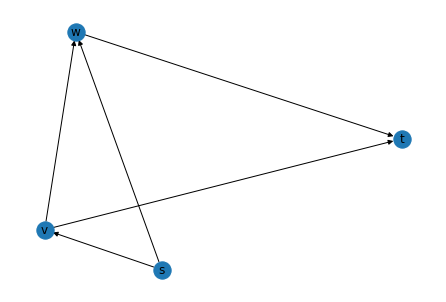

In [68]:
gnx = nx.DiGraph()
for u in g.adj:
    for v in g.adj[u]:
        gnx.add_edge(u,v,length=g.adj[u][v])
nx.draw(gnx,with_labels=True)
plt.show()

In [69]:
'''
gnx_rev = nx.DiGraph()
g.reverse()
for u in g.rev_adj:
    for v in g.rev_adj[u]:
        gnx_rev.add_edge(u,v)
nx.draw(gnx_rev,with_labels=False)
plt.show()
'''

'\ngnx_rev = nx.DiGraph()\ng.reverse()\nfor u in g.rev_adj:\n    for v in g.rev_adj[u]:\n        gnx_rev.add_edge(u,v)\nnx.draw(gnx_rev,with_labels=False)\nplt.show()\n'

In [70]:
dijkstra(g,'s')

({'s': 0, 'v': 1, 'w': 3, 't': 6},
 {'s': ['s'],
  'v': ['s', 'v'],
  'w': ['s', 'v', 'w'],
  't': ['s', 'v', 'w', 't']})